# Preprocesamiento de archivos
En este script se tranforman las etiquetas del archivo .xml a etiquetas de formtato YOLOv4 en un archivo de formato txt. Adicionalmente se verfica la correcta tranformación de las etiquetas.


In [7]:
# Habilitar contenido del Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
%cd "/content/gdrive/MyDrive/Proyecto_FD"

/content/gdrive/MyDrive/Proyecto_FD


In [13]:
import xml.etree.ElementTree as ET
import os
from glob import glob


XML_PATH = '/content/gdrive/MyDrive/Proyecto_FD/explo_xml'
CLASSES_PATH = '/content/gdrive/MyDrive/Proyecto_FD/Clases.txt'
TXT_PATH = '/content/gdrive/MyDrive/Proyecto_FD/Annotations.txt'


'''loads the classes'''
def get_classes(classes_path):
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names


classes = get_classes(CLASSES_PATH)
assert len(classes) > 0, 'no class names detected!'
print(f'num classes: {len(classes)}')

# output file
list_file = open(TXT_PATH, 'w')

for path in glob(os.path.join(XML_PATH, '*.xml')):
    in_file = open(path)

    # Parse .xml file
    tree = ET.parse(in_file)
    root = tree.getroot()
    # Write object information to .txt file
    #file_name= root.find('filename').text
    file_name = os.path.splitext(os.path.basename(path))[0] + '.jpg'
    print(file_name)
    list_file.write(file_name)  # Agregar ".jpg" al nombre del archivo
    for obj in root.iter('object'):
        cls = obj.find('name').text
        cls_id = 0
        xmlbox = obj.find('bndbox')
        b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
        list_file.write(" " + ",".join([str(a) for a in b]) + ',' + str(cls_id))
    list_file.write('\n')
list_file.close()

num classes: 1
flip_tomate_barroselas_20200806_0277_16.jpg
randomcombination3_tomate_barroselas_20200806_0022_01.jpg
noiserandom_tomate_barroselas_20200806_0293_05.jpg
randomcombination3_tomate_barroselas_20200806_0009_16.jpg
noiserandom_tomate_barroselas_20200806_0275_12.jpg
noiserandom_tomate_barroselas_20200806_0264_04.jpg
randomcombination3_tomate_barroselas_20200806_0023_16.jpg
randomcombination3_tomate_barroselas_20200806_0003_06.jpg
anglerandom_tomate_barroselas_20200806_0201_13.jpg
anglerandom_tomate_barroselas_20200806_0134_10.jpg
anglerandom_tomate_barroselas_20200806_0180_03.jpg
anglerandom_tomate_barroselas_20200806_0196_16.jpg
anglerandom_tomate_barroselas_20200806_0179_16.jpg
anglerandom_tomate_barroselas_20200806_0176_05.jpg
blurrandom_tomate_barroselas_20200806_0218_03.jpg
blurrandom_tomate_barroselas_20200806_0243_11.jpg
blurrandom_tomate_barroselas_20200806_0291_09.jpg
blurrandom_tomate_barroselas_20200806_0248_11.jpg
blurrandom_tomate_barroselas_20200806_0245_11.jpg


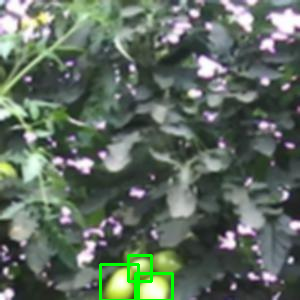

In [10]:
import os
import cv2
import random

# Function to load annotations from the .txt file
def load_annotations(annotation_file):
    annotations = []
    with open(annotation_file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            parts = line.strip().split(' ')
            filename = parts[0]
            boxes = []
            for box in parts[1:]:
                box_parts = box.split(',')
                xmin = float(box_parts[0])
                ymin = float(box_parts[1])
                xmax = float(box_parts[2])
                ymax = float(box_parts[3])
                cls = int(box_parts[4])
                boxes.append((xmin, ymin, xmax, ymax, cls))
            annotations.append((filename, boxes))
    return annotations

# Folder containing the images
image_folder = '/content/gdrive/MyDrive/Proyecto_FD/explo_img'

# Annotations file
annotation_file = '/content/gdrive/MyDrive/Proyecto_FD/Annotations.txt'

# Load annotations
annotations = load_annotations(annotation_file)

# Select a random image and its bounding boxes
image_filename, boxes = random.choice(annotations)

# Load the image
image_path = os.path.join(image_folder, image_filename)
image = cv2.imread(image_path)

# Draw bounding boxes on the image
for box in boxes:
    xmin, ymin, xmax, ymax, cls = box
    cv2.rectangle(image, (int(xmin), int(ymin)),
                  (int(xmax), int(ymax)), (0, 255, 0), 2)

# Display the image with bounding boxes
from google.colab.patches import cv2_imshow
cv2_imshow(image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
XML_PATH = '/content/gdrive/MyDrive/Proyecto_FD/test_xml'
CLASSES_PATH = '/content/gdrive/MyDrive/Proyecto_FD/Clases.txt'
TXT_PATH = '/content/gdrive/MyDrive/Proyecto_FD/Annotations_test.txt'


'''loads the classes'''
def get_classes(classes_path):
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names


classes = get_classes(CLASSES_PATH)
assert len(classes) > 0, 'no class names detected!'
print(f'num classes: {len(classes)}')

# output file
list_file = open(TXT_PATH, 'w')

for path in glob(os.path.join(XML_PATH, '*.xml')):
    in_file = open(path)

    # Parse .xml file
    tree = ET.parse(in_file)
    root = tree.getroot()
    # Write object information to .txt file
    #file_name= root.find('filename').text
    file_name = os.path.splitext(os.path.basename(path))[0] + '.jpg'
    print(file_name)
    list_file.write(file_name)  # Agregar ".jpg" al nombre del archivo
    for obj in root.iter('object'):
        cls = obj.find('name').text
        cls_id = 0
        xmlbox = obj.find('bndbox')
        b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
        list_file.write(" " + ",".join([str(a) for a in b]) + ',' + str(cls_id))
    list_file.write('\n')
list_file.close()

num classes: 1
flip_tomate_barroselas_20200806_0237_17.jpg
tomate_barroselas_20200806_0266_04.jpg
noiserandom_tomate_barroselas_20200806_0127_01.jpg
noiserandom_tomate_barroselas_20200806_0245_05.jpg
translaterandom_tomate_barroselas_20200806_0011_12.jpg
tomate_barroselas_20200806_0165_07.jpg
noiserandom_tomate_barroselas_20200806_0097_05.jpg
translaterandom_tomate_barroselas_20200806_0072_13.jpg
anglerandom_tomate_barroselas_20200806_0116_14.jpg
anglerandom_tomate_barroselas_20200806_0043_14.jpg
anglerandom_tomate_barroselas_20200806_0064_03.jpg
flip_tomate_barroselas_20200806_0215_17.jpg
flip_tomate_barroselas_20200806_0011_00.jpg
anglerandom_tomate_barroselas_20200806_0207_12.jpg
anglerandom_tomate_barroselas_20200806_0228_08.jpg
blurrandom_tomate_barroselas_20200806_0031_08.jpg
flip_tomate_barroselas_20200806_0127_06.jpg
blurrandom_tomate_barroselas_20200806_0239_12.jpg
flip_tomate_barroselas_20200806_0014_11.jpg
